## Lecture CSV

In [7]:
import plotly.express as px
import pandas as pd

In [8]:
# Lecture du CSV
df_sd = pd.read_csv("../datas/SpeedDatingData.csv", encoding = "ISO-8859-1")
df_sd.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


---

## Analyse - Axe 5

### Le but principal à participer à l'événement influence-t-il la décision de revoir un partenaire ?

Rappel de la répartition du but principal à participer à l'événement

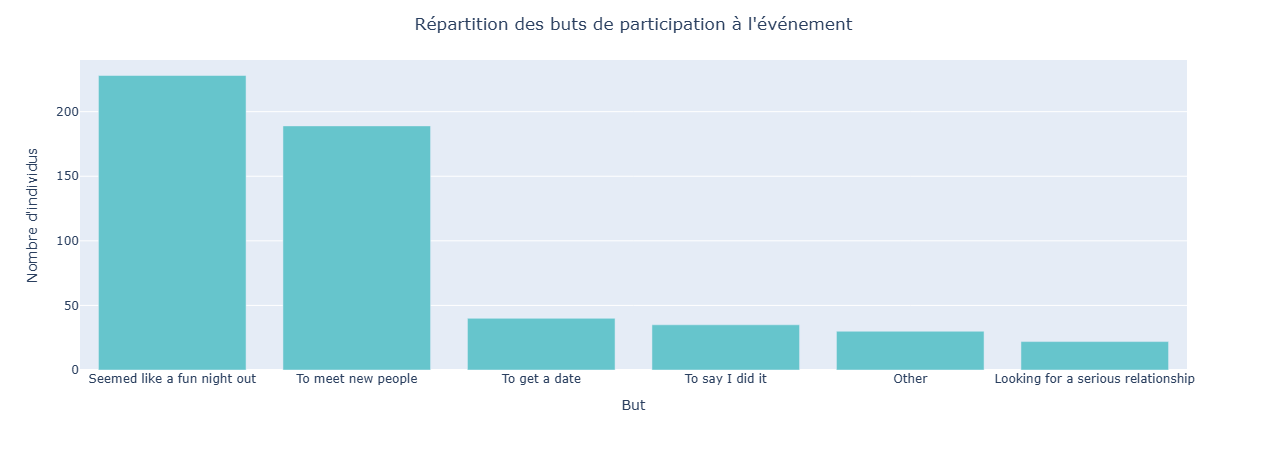

In [9]:
# Sélection des colonnes pertinentes pour l'analyse : dec + goal
columns_to_keep = ["dec", "goal"]

# Vérifier les valeurs manquantes
missing_values = df_sd[columns_to_keep].isnull().sum()
print("Valeurs manquantes : ")
print(missing_values)

print("")

print("Pourcentage de valeurs manquantes : ")
print(100 * missing_values / df_sd.shape[0])

Valeurs manquantes : 
dec      0
goal    79
dtype: int64

Pourcentage de valeurs manquantes : 
dec     0.000000
goal    0.942946
dtype: float64


J'ai peu de valeurs manquantes, je peux donc les supprimer.

In [10]:
print("Nombre de lignes avant suppression : {}".format(df_sd[columns_to_keep].shape[0]))

# Suppression des lignes avec des valeurs manquantes
df_sd_clean = df_sd[columns_to_keep].dropna()

print("Nombre de lignes après suppression : {}".format(df_sd_clean.shape[0]))

# Vérifier que les valeurs manquantes ont été remplacées
df_sd_clean.isnull().sum()

Nombre de lignes avant suppression : 8378
Nombre de lignes après suppression : 8299


dec     0
goal    0
dtype: int64

In [11]:
df_sd_clean["goal"] = df_sd_clean["goal"].map({1: "Seemed like a fun night out", 2: "To meet new people", 3: "To get a date", 
                                                       4: "Looking for a serious relationship", 5: "To say I did it", 
                                                       6: "Other"})

#### Influence du but de participation à l'évenement sur la décision de revoir

In [12]:
# Calculer la proportion de décision de revoir selon le but
df_grouped = df_sd_clean.groupby("goal")["dec"].mean().reset_index()
df_grouped = df_grouped.sort_values(by="dec", ascending=False)

fig = px.bar(df_grouped, x="goal", y="dec",
             labels={"goal": "But", "dec": "Décision de revoir"},
             text="dec", color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title="Décision de revoir selon le but de participation à l'événement", title_x=0.5)
fig.update_traces(texttemplate="%{text:.2%}")
fig.show()

Analyse

Sur ce barplot, on observe que 52 % des participants recherchant une relation sérieuse souhaitent revoir leur partenaire, contre 41 % parmi ceux venus simplement pour s’amuser.

Autrement dit, l’intention de s’engager dans une relation sérieuse influence positivement la décision de revoir quelqu’un, mais aussi les participants sans intention particulière restent ouverts à une rencontre.

Par ailleurs, bien que les personnes recherchant une relation sérieuse soient les moins représentées dans l’échantillon initial, leur comportement a une influence notable sur les résultats.